In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np 
import scipy.fft
from operators.operators import total_mass, total_momentum, total_energy_k, total_L2_norm
from operators.operators import solve_poisson_equation, psi_ln_sw, solve_poisson_equation, fft_, J_matrix_inv
from operators.operators import integral_I1, integral_I2, integral_I0, linear_2_two_stream_SW
from operators.closure import closure_momentum, closure_energy, closure_energy_local

In [3]:
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib.pylab as pl
import matplotlib
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogLocator, AutoLocator

font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Langmuir Wave SW 

In [4]:
# set up configuration parameters
# number of Fourier spectral terms in x
Nx = 50
Nx_total = 2 * Nx + 1
# number of Hermite spectral terms in v
Nv = 11
# Velocity scaling of electron and ion
alpha_e = 0.1
alpha_i = np.sqrt(1 / 1836)
# perturbation magnitude
epsilon = 0.01
# x grid is from 0 to L
L = 2 * np.pi
# final time
T = 100
# time stepping
dt = 0.1
# time vector
t_vec = np.linspace(0, T, int(T / dt) + 1)
# velocity scaling
u_e = 1
u_i = 1
# mass normalized
m_e = 1
m_i = 1836
# charge normalized
q_e = -1
q_i = 1
# closure
closure = "energy"

In [5]:
# inverse J
J_inv = J_matrix_inv(Nx=Nx, L=L)

In [6]:
# velocity grid for plotting purposes
v = np.linspace(0.5, 1.5, int(1e3))
# spatial grid 
x_project = np.linspace(0, L, int(1e5))
x = np.linspace(0, L, Nx_total)

## read in simulation results

In [7]:
sol_midpoint_u = np.load("../data/SW/langmuir/sol_midpoint_u_" + str(Nv) + "_" + str(closure) + "_closure.npy")
sol_midpoint_t = np.load("../data/SW/langmuir/sol_midpoint_t_" + str(Nv) + "_" + str(closure) + "_closure.npy")
print(np.shape(sol_midpoint_u))
print(np.shape(sol_midpoint_t))

(2229, 1001)
(1001,)


In [8]:
# initialize the electric potential
E_midpoint = np.zeros((Nx_total, len(sol_midpoint_t)), dtype="complex128")

In [9]:
# initialize the states for implicit midpoint (symplectic)
state_e_midpoint = np.zeros((Nv, Nx_total, len(sol_midpoint_t)), dtype="complex128")
state_i_midpoint = np.zeros((Nv, Nx_total, len(sol_midpoint_t)), dtype="complex128")

closure_e = np.zeros((Nx_total, len(sol_midpoint_t)), dtype="complex128")
closure_i = np.zeros((Nx_total, len(sol_midpoint_t)), dtype="complex128")

for ii in range(len(sol_midpoint_t)):
    print("t = ", sol_midpoint_t[ii])
    for jj in range(Nv):
        # unwind the flattening in order to solve the linear system
        state_e_midpoint[jj, :, ii] = sol_midpoint_u[jj * Nx_total: (jj + 1) * Nx_total, ii]
        state_i_midpoint[jj, :, ii] = sol_midpoint_u[Nv * Nx_total + jj * Nx_total: Nv * Nx_total + (jj + 1) * Nx_total, ii]

    E_midpoint[:, ii] = solve_poisson_equation(state_e=state_e_midpoint[:, :, ii],
                                               state_i=state_i_midpoint[:, :, ii],
                                               alpha_e=alpha_e, alpha_i=alpha_i, Nx=Nx, L=L, Nv=Nv)
    # energy closure
    if closure == "energy":
        closure_e = closure_energy(state=state_e_midpoint[:, :, ii], alpha_s=alpha_e, u_s=u_e, Nv=Nv, E=E_midpoint[:, ii], J_inv=J_inv, q_s=q_e, m_s=m_e, Nx_total=Nx_total, Nx=Nx)
        closure_i = closure_energy(state=state_i_midpoint[:, :, ii], alpha_s=alpha_i, u_s=u_i, Nv=Nv, E=E_midpoint[:, ii], J_inv=J_inv, q_s=q_i, m_s=m_i, Nx_total=Nx_total, Nx=Nx)
    
    if closure == "energy_local":
        # energy closure
        closure_e = closure_energy_local(state=state_e_midpoint[:, :, ii], alpha_s=alpha_e, u_s=u_e, Nv=Nv, Nx=Nx)
        closure_i = closure_energy_local(state=state_i_midpoint[:, :, ii], alpha_s=alpha_i, u_s=u_i, Nv=Nv, Nx=Nx)
        
    # momentum closure
    elif closure == "momentum":
        # momentum closure
        closure_e = closure_momentum(state=state_e_midpoint[:, :, ii], alpha_s=alpha_e, u_s=u_e, Nv=Nv)
        closure_i = closure_momentum(state=state_i_midpoint[:, :, ii], alpha_s=alpha_i, u_s=u_i, Nv=Nv)

    # truncation
    elif closure == "truncation":
        #  mass closure
        closure_e = np.zeros(Nx_total)
        closure_i = np.zeros(Nx_total)

t =  0.0
t =  0.1
t =  0.2
t =  0.30000000000000004
t =  0.4
t =  0.5
t =  0.6000000000000001
t =  0.7000000000000001
t =  0.8
t =  0.9
t =  1.0
t =  1.1
t =  1.2000000000000002
t =  1.3
t =  1.4000000000000001
t =  1.5
t =  1.6
t =  1.7000000000000002
t =  1.8
t =  1.9000000000000001
t =  2.0
t =  2.1
t =  2.2
t =  2.3000000000000003
t =  2.4000000000000004
t =  2.5
t =  2.6
t =  2.7
t =  2.8000000000000003
t =  2.9000000000000004
t =  3.0
t =  3.1
t =  3.2
t =  3.3000000000000003
t =  3.4000000000000004
t =  3.5
t =  3.6
t =  3.7
t =  3.8000000000000003
t =  3.9000000000000004
t =  4.0
t =  4.1000000000000005
t =  4.2
t =  4.3
t =  4.4
t =  4.5
t =  4.6000000000000005
t =  4.7
t =  4.800000000000001
t =  4.9
t =  5.0
t =  5.1000000000000005
t =  5.2
t =  5.300000000000001
t =  5.4
t =  5.5
t =  5.6000000000000005
t =  5.7
t =  5.800000000000001
t =  5.9
t =  6.0
t =  6.1000000000000005
t =  6.2
t =  6.300000000000001
t =  6.4
t =  6.5
t =  6.6000000000000005
t =  6.7
t =  6.800000000

In [10]:
E_field = np.zeros(np.shape(E_midpoint))
for ii in range(len(sol_midpoint_t)):
    E_field[:, ii] = fft_(E_midpoint[:, ii], Nx, x, L)

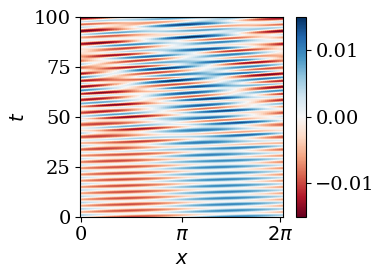

In [16]:
fig, ax = plt.subplots(figsize=(4, 3))
pos = ax.pcolormesh(x, sol_midpoint_t, E_field.T, cmap="RdBu", vmin=-0.015, vmax=0.015)
cbar = fig.colorbar(pos)
ax.set_xlabel("$x$")
_ = ax.set_xticks([0, np.pi, 2*np.pi-.05])
_ = ax.set_xticklabels([r"0", r"$\pi$", r"$2\pi$"])
_ = ax.set_ylabel("$t$")
plt.tight_layout()

plt.savefig("../figs/SW/langmuir/electric_field_SW_" + str(closure) + "_" + str(Nv) + ".png", dpi=600, bbox_inches='tight')

In [12]:
#np.save("../data/SW/langmuir/electron_" + str(closure) + "_" + str(Nv) + ".npy", state_e_midpoint)
#np.save("../data/SW/langmuir/ion_" + str(closure) + "_" + str(Nv) + ".npy", state_i_midpoint)

In [13]:
highres_electron = np.load("../data/SW/langmuir/electron_truncation_1001.npy")
highres_ion = np.load("../data/SW/langmuir/ion_truncation_1001.npy")

/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_38182/3331185220.py:2: RuntimeWarning: divide by zero encountered in log10
  pos = ax.pcolormesh(np.arange(Nv), sol_midpoint_t, np.log10(np.abs(state_e_midpoint[:, Nx-1, :])).T, cmap="inferno", vmin=-15, vmax=0)


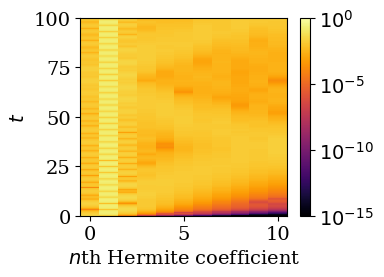

In [14]:
fig, ax = plt.subplots(figsize=(4, 3))
pos = ax.pcolormesh(np.arange(Nv), sol_midpoint_t, np.log10(np.abs(state_e_midpoint[:, Nx-1, :])).T, cmap="inferno", vmin=-15, vmax=0)
cbar = fig.colorbar(pos, ticks=[-15, -10, -5, 0])
cbar.ax.set_yticklabels(['$10^{-15}$','$10^{-10}$', '$10^{-5}$', '$10^{0}$'])
ax.set_xticks([0, 5, 10])
ax.set_xlabel("$n$th Hermite coefficient")
_ = ax.set_ylabel("$t$")
plt.tight_layout()
plt.savefig("../figs/SW/langmuir/moment_cascade_SW_" + str(closure) + "_" + str(Nv) + ".png", dpi=600, bbox_inches='tight')

/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_38182/3034074333.py:2: RuntimeWarning: divide by zero encountered in log10
  pos = ax.pcolormesh(np.arange(1001), sol_midpoint_t, np.log10(np.abs(highres_electron[:, Nx-1, :])).T, cmap="inferno", vmin=-15, vmax=0)


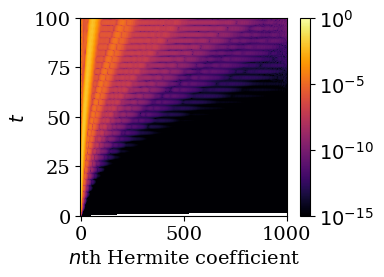

In [15]:
fig, ax = plt.subplots(figsize=(4, 3))
pos = ax.pcolormesh(np.arange(1001), sol_midpoint_t, np.log10(np.abs(highres_electron[:, Nx-1, :])).T, cmap="inferno", vmin=-15, vmax=0)
cbar = fig.colorbar(pos, ticks=[-15, -10, -5, 0])
cbar.ax.set_yticklabels(['$10^{-15}$','$10^{-10}$', '$10^{-5}$', '$10^{0}$'])
ax.set_xlabel("$n$th Hermite coefficient")
_ = ax.set_ylabel("$t$")
ax.set_xticks([0, 500, 1000])
plt.tight_layout()
plt.savefig("../figs/SW/langmuir/moment_cascade_SW_truncation_1001.png", dpi=600, bbox_inches='tight')

# Conservation Laws

### mass conservation 

In [126]:
mass_midpoint = np.zeros(len(sol_midpoint_t))

for ii in range(0, len(sol_midpoint_t)):
    mass_midpoint[ii] = total_mass(state=state_e_midpoint[:, :, ii], alpha_s=alpha_e, L=L, Nv=Nv, Nx=Nx)\
                      + total_mass(state=state_i_midpoint[:, :, ii], alpha_s=alpha_i, L=L, Nv=Nv, Nx=Nx)

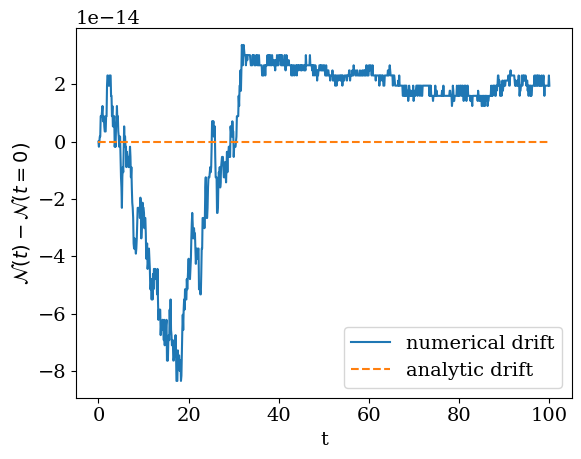

In [13]:
plt.plot(sol_midpoint_t, np.real(mass_midpoint - mass_midpoint[0]), label="numerical drift")
plt.plot(sol_midpoint_t, np.real(sol_midpoint_u[-1]).real, ls="--", label="analytic drift")
plt.ylabel(r"$\mathcal{N}(t)-\mathcal{N}(t=0)$")
plt.xlabel("t")
#plt.yscale("log")
plt.legend()

### momentum conservation

In [14]:
momentum_midpoint_e = np.zeros(len(sol_midpoint_t))
momentum_midpoint_i = np.zeros(len(sol_midpoint_t))
momentum_midpoint = np.zeros(len(sol_midpoint_t))

for ii in range(0, len(sol_midpoint_t)):
    momentum_midpoint_e[ii] = total_momentum(state=state_e_midpoint[:, :, ii], alpha_s=alpha_e, L=L, Nv=Nv, m_s=m_e, u_s=u_e, Nx=Nx)
    momentum_midpoint_i[ii] =  total_momentum(state=state_i_midpoint[:, :, ii], alpha_s=alpha_i, L=L, Nv=Nv, m_s=m_i, u_s=u_i, Nx=Nx)             
    
    momentum_midpoint[ii] = momentum_midpoint_e[ii]+ momentum_midpoint_i[ii]

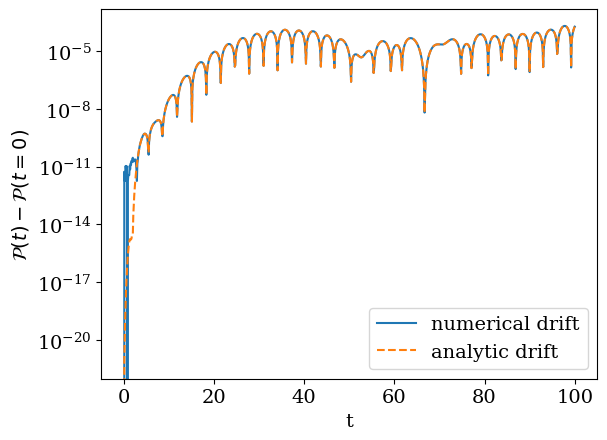

In [15]:
#plt.plot(sol_midpoint_t, np.abs(momentum_midpoint_i))
plt.plot(sol_midpoint_t, np.abs(momentum_midpoint-momentum_midpoint[0]), label="numerical drift")
plt.plot(sol_midpoint_t, np.abs(sol_midpoint_u[-3]), ls="--", label="analytic drift")
plt.ylabel(r"$\mathcal{P}(t)-\mathcal{P}(t=0)$")
plt.xlabel("t")
plt.yscale("log")
plt.legend()

### energy conservation

In [16]:
energy_k_midpoint = np.zeros(len(sol_midpoint_t), dtype="complex128")
energy_p_midpoint = np.zeros(len(sol_midpoint_t), dtype="complex128")

for ii in range(0, len(sol_midpoint_t)):
    energy_k_midpoint[ii] = total_energy_k(state=state_e_midpoint[:, :, ii], alpha_s=alpha_e, L=L, Nv=Nv, m_s=m_e, u_s=u_e, Nx=Nx)\
                           +total_energy_k(state=state_i_midpoint[:, :, ii], alpha_s=alpha_i, L=L, Nv=Nv, m_s=m_i, u_s=u_i, Nx=Nx)

    energy_p_midpoint[ii] = 0.5 * L * np.flip(E_midpoint[:, ii]).T @ E_midpoint[:, ii]

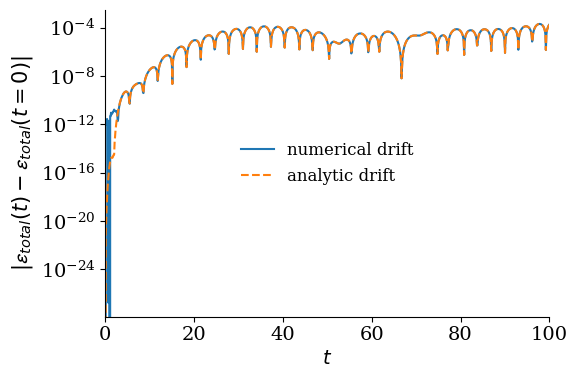

In [17]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

ax.plot(sol_midpoint_t, np.abs(energy_p_midpoint + energy_k_midpoint -energy_p_midpoint[0]-energy_k_midpoint[0]), label="numerical drift")
ax.plot(sol_midpoint_t, np.abs(sol_midpoint_u[-5]), ls="--", label="analytic drift")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|\mathcal{\epsilon}_{total}(t)-\mathcal{\epsilon}_{total}(t=0)|$", fontsize=15)
ax.set_xlabel("$ t$")
ax.set_xlim(0, T)
ax.set_yscale("log")
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='center')
legend.get_frame().set_alpha(0)
plt.tight_layout()

In [18]:
L2_midpoint = np.zeros(len(sol_midpoint_t))

for ii in range(0, len(sol_midpoint_t)):
    L2_midpoint[ii] = np.abs(total_L2_norm(state=state_e_midpoint[:, :, ii], alpha_s=alpha_e, L=L, Nv=Nv))\
                    + np.abs(total_L2_norm(state=state_i_midpoint[:, :, ii], alpha_s=alpha_i, L=L, Nv=Nv))

In [19]:
np.save("../data/SW/langmuir/L2_" + str(closure) + "_" + str(Nv) + ".npy", L2_midpoint)
np.save("../data/SW/langmuir/mass_" + str(closure) + "_" + str(Nv) + ".npy", mass_midpoint)
np.save("../data/SW/langmuir/momentum_" + str(closure) + "_" + str(Nv) + ".npy", momentum_midpoint)
np.save("../data/SW/langmuir/energy_" + str(closure) + "_" + str(Nv) + ".npy", energy_p_midpoint + energy_k_midpoint)

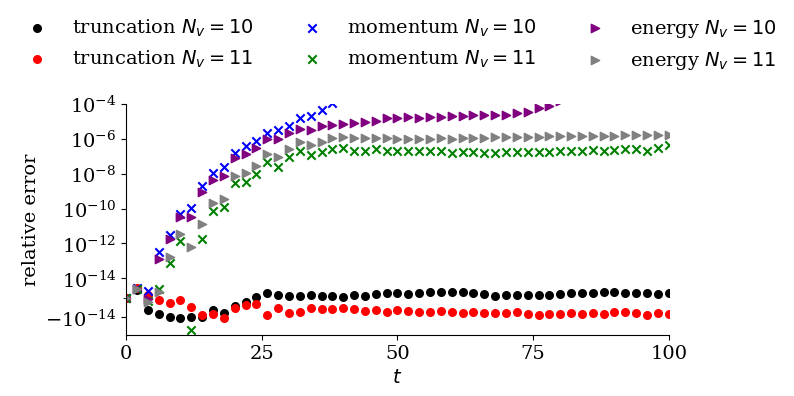

In [31]:
# L2 conservation
# Nv = 10
L2_truncation_10 = np.load("../data/SW/langmuir/L2_truncation_10.npy").real
L2_momentum_10 = np.load("../data/SW/langmuir/L2_momentum_10.npy").real
L2_energy_10 = np.load("../data/SW/langmuir/L2_energy_10.npy").real
# Nv = 11
L2_truncation_11 = np.load("../data/SW/langmuir/L2_truncation_11.npy").real
L2_momentum_11 = np.load("../data/SW/langmuir/L2_momentum_11.npy").real
L2_energy_11 = np.load("../data/SW/langmuir/L2_energy_11.npy").real


# plot overall conservation properties 
fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
ax.scatter(sol_midpoint_t[:len(L2_truncation_10)][::20], ((L2_truncation_10 - L2_truncation_10[0])/L2_truncation_10[0])[::20], s=30, color="black", label=r"truncation $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(L2_truncation_11)][::20], ((L2_truncation_11 - L2_truncation_11[0])/L2_truncation_11[0])[::20], s=30, color="red", label=r"truncation $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(L2_momentum_10)][::20], ((L2_momentum_10 - L2_momentum_10[0])/L2_momentum_10[0])[::20], marker="x", color="blue", label=r"momentum $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(L2_momentum_11)][::20], ((L2_momentum_11 - L2_momentum_11[0])/L2_momentum_11[0])[::20], marker="x", color="green", label=r"momentum $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(L2_energy_10)][::20], ((L2_energy_10 - L2_energy_10[0])/(L2_energy_10[0]))[::20], marker=">", color="purple", label=r"energy $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(L2_energy_11)][::20], ((L2_energy_11 - L2_energy_11[0])/(L2_energy_11[0]))[::20], marker=">", color="grey", label=r"energy $N_{v}=11$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"relative error")
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xlabel("$t$")
ax.set_xlim(0, 100)
plt.yscale('symlog', linthresh=1e-14)
ax.set_ylim(-1e-13, 1e-4)
ax.set_yticks([-1e-14, 1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4])
legend = ax.legend(ncols=3, fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.45))
text = ax.text(-0.2,1.05, " ", transform=ax.transAxes)
legend.get_frame().set_alpha(0)
#plt.tight_layout()
plt.savefig("../figs/SW/langmuir/L2_conservation_langmuir_wave_SW.png", bbox_inches='tight', dpi=600)

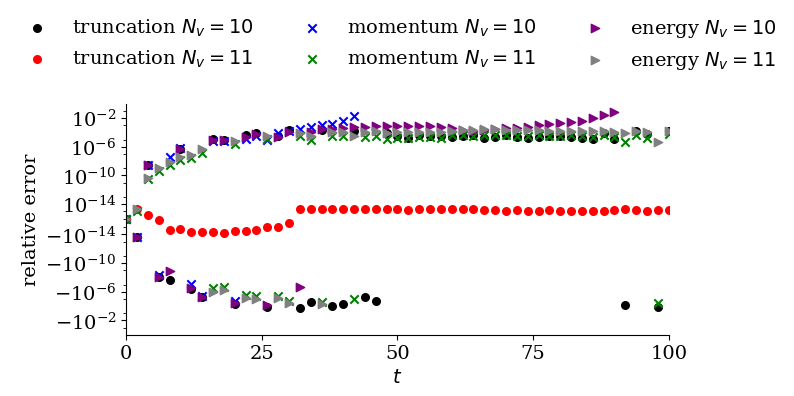

In [30]:
# mass conservation
# Nv = 10
mass_truncation_10 = np.load("../data/SW/langmuir/mass_truncation_10.npy").real
mass_momentum_10 = np.load("../data/SW/langmuir/mass_momentum_10.npy").real
mass_energy_10 = np.load("../data/SW/langmuir/mass_energy_10.npy").real
# Nv = 11
mass_truncation_11 = np.load("../data/SW/langmuir/mass_truncation_11.npy").real
mass_momentum_11 = np.load("../data/SW/langmuir/mass_momentum_11.npy").real
mass_energy_11 = np.load("../data/SW/langmuir/mass_energy_11.npy").real


# plot overall conservation properties 
fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
ax.scatter(sol_midpoint_t[:len(mass_truncation_10)][::20], ((mass_truncation_10 - mass_truncation_10[0])/mass_truncation_10[0])[::20], s=30, color="black", label=r"truncation $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(mass_truncation_11)][::20], ((mass_truncation_11 - mass_truncation_11[0])/mass_truncation_11[0])[::20], s=30, color="red", label=r"truncation $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(mass_momentum_10)][::20], ((mass_momentum_10 - mass_momentum_10[0])/mass_momentum_10[0])[::20], marker="x", color="blue", label=r"momentum $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(mass_momentum_11)][::20], ((mass_momentum_11 - mass_momentum_11[0])/mass_momentum_11[0])[::20], marker="x", color="green", label=r"momentum $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(mass_energy_10)][::20], ((mass_energy_10 - mass_energy_10[0])/(mass_energy_10[0]))[::20], marker=">", color="purple", label=r"energy $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(mass_energy_11)][::20], ((mass_energy_11 - mass_energy_11[0])/(mass_energy_11[0]))[::20], marker=">", color="grey", label=r"energy $N_{v}=11$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"relative error")
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xlabel("$t$")
ax.set_xlim(0, 100)
plt.yscale('symlog', linthresh=1e-15)
ax.set_ylim(-1e0, 1e0)
ax.set_yticks([-1e-2, -1e-6, -1e-10, -1e-14, 1e-14, 1e-6, 1e-10, 1e-2])
legend = ax.legend(ncols=3, fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.45))
text = ax.text(-0.2,1.05, " ", transform=ax.transAxes)
legend.get_frame().set_alpha(0)
#plt.tight_layout()
plt.savefig("../figs/SW/langmuir/mass_conservation_langmuir_wave_SW.png", bbox_inches='tight', dpi=600)

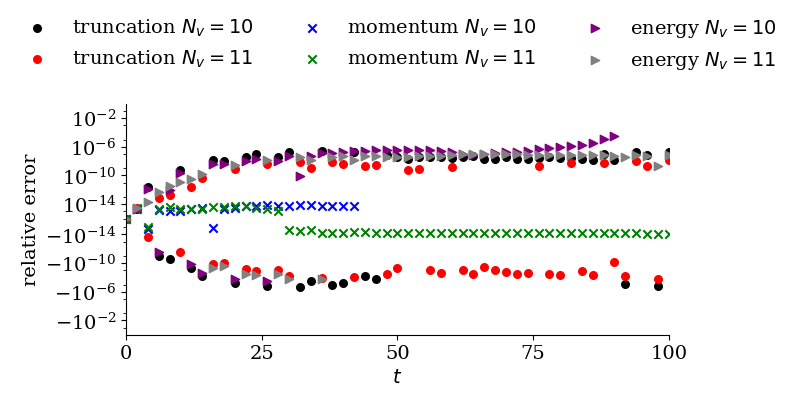

In [29]:
# momemtum conservation
# Nv = 10
momemtum_truncation_10 = np.load("../data/SW/langmuir/momentum_truncation_10.npy").real
momemtum_momentum_10 = np.load("../data/SW/langmuir/momentum_momentum_10.npy").real
momemtum_energy_10 = np.load("../data/SW/langmuir/momentum_energy_10.npy").real
# Nv = 11
momemtum_truncation_11 = np.load("../data/SW/langmuir/momentum_truncation_11.npy").real
momemtum_momentum_11 = np.load("../data/SW/langmuir/momentum_momentum_11.npy").real
momemtum_energy_11 = np.load("../data/SW/langmuir/momentum_energy_11.npy").real


# plot overall conservation properties 
fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
ax.scatter(sol_midpoint_t[:len(momemtum_truncation_10)][::20], ((momemtum_truncation_10 - momemtum_truncation_10[0])/momemtum_truncation_10[0])[::20], s=30, color="black", label=r"truncation $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(momemtum_truncation_11)][::20], ((momemtum_truncation_11 - momemtum_truncation_11[0])/momemtum_truncation_11[0])[::20], s=30, color="red", label=r"truncation $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(momemtum_momentum_10)][::20], ((momemtum_momentum_10 - momemtum_momentum_10[0])/momemtum_momentum_10[0])[::20], marker="x", color="blue", label=r"momentum $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(momemtum_momentum_11)][::20], ((momemtum_momentum_11 - momemtum_momentum_11[0])/momemtum_momentum_11[0])[::20], marker="x", color="green", label=r"momentum $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(momemtum_energy_10)][::20], ((momemtum_energy_10 - momemtum_energy_10[0])/(momemtum_energy_10[0]))[::20], marker=">", color="purple", label=r"energy $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(momemtum_energy_11)][::20], ((momemtum_energy_11 - momemtum_energy_11[0])/(momemtum_energy_11[0]))[::20], marker=">", color="grey", label=r"energy $N_{v}=11$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"relative error")
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xlabel("$t$")
ax.set_xlim(0, 100)
plt.yscale('symlog', linthresh=1e-15)
ax.set_ylim(-1e0, 1e0)
ax.set_yticks([-1e-2, -1e-6, -1e-10, -1e-14, 1e-14, 1e-6, 1e-10, 1e-2])
legend = ax.legend(ncols=3, fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.45))
text = ax.text(-0.2,1.05, " ", transform=ax.transAxes)
legend.get_frame().set_alpha(0)
#plt.tight_layout()
plt.savefig("../figs/SW/langmuir/momentum_conservation_langmuir_wave_SW.png", bbox_inches='tight', dpi=600)

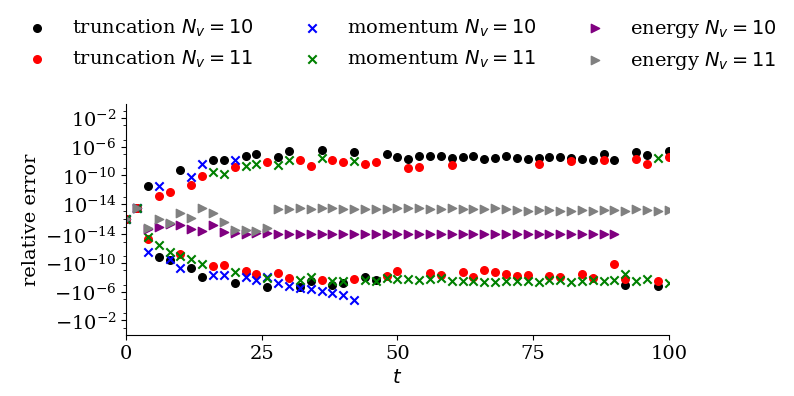

In [32]:
# energy conservation
# Nv = 10
energy_truncation_10 = np.load("../data/SW/langmuir/energy_truncation_10.npy").real
energy_momentum_10 = np.load("../data/SW/langmuir/energy_momentum_10.npy").real
energy_energy_10 = np.load("../data/SW/langmuir/energy_energy_10.npy").real
# Nv = 11
energy_truncation_11 = np.load("../data/SW/langmuir/energy_truncation_11.npy").real
energy_momentum_11 = np.load("../data/SW/langmuir/energy_momentum_11.npy").real
energy_energy_11 = np.load("../data/SW/langmuir/energy_energy_11.npy").real


# plot overall conservation properties 
fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
ax.scatter(sol_midpoint_t[:len(energy_truncation_10)][::20], ((energy_truncation_10 - energy_truncation_10[0])/energy_truncation_10[0])[::20], s=30, color="black", label=r"truncation $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(energy_truncation_11)][::20], ((energy_truncation_11 - energy_truncation_11[0])/energy_truncation_11[0])[::20], s=30, color="red", label=r"truncation $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(energy_momentum_10)][::20], ((energy_momentum_10 - energy_momentum_10[0])/energy_momentum_10[0])[::20], marker="x", color="blue", label=r"momentum $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(energy_momentum_11)][::20], ((energy_momentum_11 - energy_momentum_11[0])/energy_momentum_11[0])[::20], marker="x", color="green", label=r"momentum $N_{v}=11$")

ax.scatter(sol_midpoint_t[:len(energy_energy_10)][::20], ((energy_energy_10 - energy_energy_10[0])/(energy_energy_10[0]))[::20], marker=">", color="purple", label=r"energy $N_{v}=10$")
ax.scatter(sol_midpoint_t[:len(energy_energy_11)][::20], ((energy_energy_11 - energy_energy_11[0])/(energy_energy_11[0]))[::20], marker=">", color="grey", label=r"energy $N_{v}=11$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"relative error")
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xlabel("$t$")
ax.set_xlim(0, 100)
plt.yscale('symlog', linthresh=1e-15)
ax.set_ylim(-1e0, 1e0)
ax.set_yticks([-1e-2, -1e-6, -1e-10, -1e-14, 1e-14, 1e-6, 1e-10, 1e-2])
legend = ax.legend(ncols=3, fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.45))
text = ax.text(-0.2,1.05, " ", transform=ax.transAxes)
legend.get_frame().set_alpha(0)
#plt.tight_layout()
plt.savefig("../figs/SW/langmuir/energy_conservation_langmuir_wave_SW.png", bbox_inches='tight', dpi=600)

In [201]:
# # plot overall conservation properties 
# fig, ax = plt.subplots(ncols=1, figsize=(7, 4))
# #ax.plot(sol_midpoint_t, np.abs(sol_midpoint_u[-2]), "--", c="orange", linewidth=4, alpha=0.6, label=r"analytic mass")
# #ax.plot(sol_midpoint_t, np.abs(sol_midpoint_u[-4]), "-", c="green", linewidth=4, alpha=0.6, label=r"analytic momentum")
# #ax.plot(sol_midpoint_t, np.abs(sol_midpoint_u[-6]), ":", c="red", linewidth=4, alpha=0.6, label=r"analytic energy")
# #ax.plot(sol_midpoint_t, np.abs(sol_midpoint_u[-7]), "-.", c="pink", linewidth=4, alpha=0.4, label=r"analytic $\mathcal{L}_{2}$")

# ax.scatter(sol_midpoint_t[::20], ((mass_midpoint-mass_midpoint[0])/mass_midpoint[0])[::20], s=30, color="black", label=r"mass")
# ax.plot(sol_midpoint_t[::30], ((momentum_midpoint-momentum_midpoint[0])/momentum_midpoint[0])[::30], "x", color="blue", label=r"momentum")
# ax.plot(sol_midpoint_t[::20], ((energy_p_midpoint + energy_k_midpoint -energy_p_midpoint[0]-energy_k_midpoint[0])/(energy_p_midpoint[0]+energy_k_midpoint[0]))[::20], ">", color="purple", label=r"energy")
# ax.plot(sol_midpoint_t[::30], ((L2_midpoint-L2_midpoint[0])/L2_midpoint[0])[::30], "*", c="grey", label=r" $\mathcal{L}_{2}$ norm")


# ax.set_ylim(-1e-5, 1e-5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_ylabel(r"relative error")
# #ax.set_xticks([0, 25, 50, 75, 100])
# ax.set_xlabel("$t$")
# ax.set_xlim(0, 100)
# plt.yscale('symlog')
# legend = ax.legend(ncols=3, fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.45))
# text = ax.text(-0.2,1.05, " ", transform=ax.transAxes)
# legend.get_frame().set_alpha(0)

# #y_formatter = ScalarFormatter()
# #y_formatter.set_powerlimits((-3, 3))
# #ax.yaxis.set_major_formatter(y_formatter)

# #plt.tight_layout()
# plt.savefig("../figs/SW/langmuir/conservation_" + str(Nv) + "_langmuir_wave_SW_" + str(closure) + ".png", bbox_inches='tight', dpi=600)